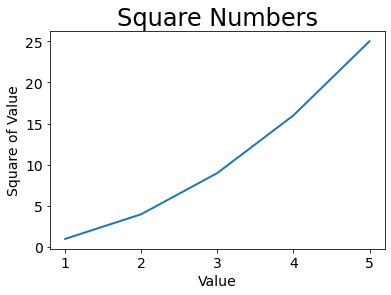

In [10]:
# Plotting Simple Line Graph
import matplotlib.pyplot as plt

input_values = [1,2,3,4,5]
squares = [1,4,9,16,25]
plt.plot(input_values, squares, linewidth=2)

# Set chart title and lable axes
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

# Set size of tick labels
plt.tick_params(axis='both', labelsize=14)
plt.show()

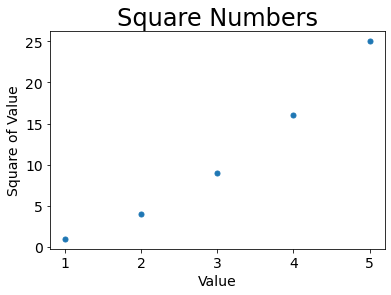

In [9]:
# Plotting a Scatter
x_values = [1,2,3,4,5]
y_values = [1,4,9,16,25]

plt.scatter(x_values, y_values, s=25)

# Set chart title and label axes
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

# Set size of tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

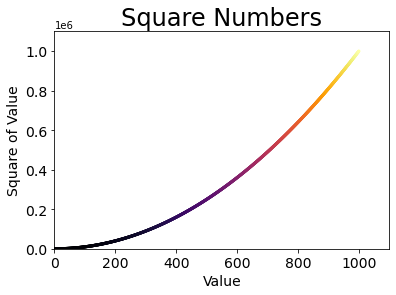

In [53]:
# Plotting a Scatter Using Color(s)
from matplotlib import cm

x_values = list(range(1,1001))
y_values = [x**2 for x in x_values]

# Ways to add color
#plt.scatter(x_values, y_values, c='red', edgecolor='none', s=10)
# * Using RGB for color *
# plt.scatter(x_values, y_values, color=(0.9,0.7,0.8), edgecolor='none', s=10)
# * Using built in Colormap(cm) *
plt.scatter(x_values, y_values, c=y_values, cmap=cm.inferno, edgecolor='none', s=10)

# Set chart title and label axes
plt.title("Square Numbers", fontsize=24)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Square of Value", fontsize=14)

# Set size of tick labels
plt.tick_params(axis='both', which='major', labelsize=14)

# Set the range for each axis
plt.axis([0,1100,0,1100000])

# plt.show()
# Saves plot automatically. Can't run plt.show before it - otherwise blank
plt.savefig('squares_plot.png', bbox_inches='tight')

# Random Walks

In [100]:
# Creating RandomWalk() Class

from random import choice

class RandomWalk():
    """ A class to generate random walks """
    
    def __init__(self, num_points=50000):
        """ Initialize attributes of a walk """
        self.num_points = num_points
        
        # All walks start at (0,0)
        self.x_values = [0]
        self.y_values = [0]
        
    def fill_walk(self):
        """ Calculate all the points in the walk """
        
        # Keep taking steps until the walk reaches the desired length
        while len(self.x_values) < self.num_points:
            
            # Decide which direction and how far to go in that direction
            x_direction = choice([1, -1])
            x_distance = choice([0,1,2,3,4])
            x_step = x_direction * x_distance
            
            y_direction = choice([1, -1])
            y_distance = choice([0,1,2,3,4])
            y_step = y_direction * y_distance
            
            # Reject moves that go nowhere
            if x_step == 0 and y_step == 0:
                continue
            
            # Calculate the next x and y values
            next_x = self.x_values[-1] + x_step
            next_y = self.y_values[-1] + y_step
            
            self.x_values.append(next_x)
            self.y_values.append(next_y)

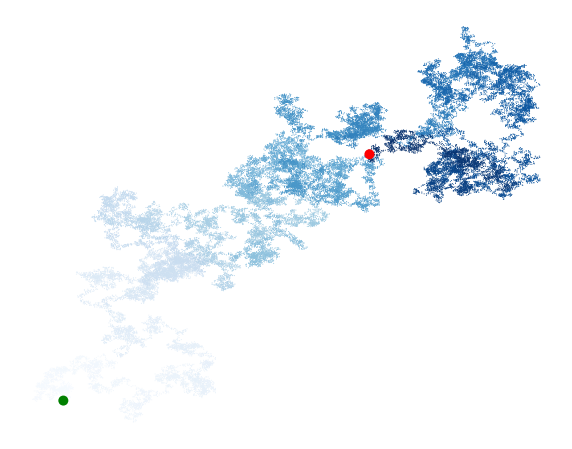

Make another walk? (y/n): y


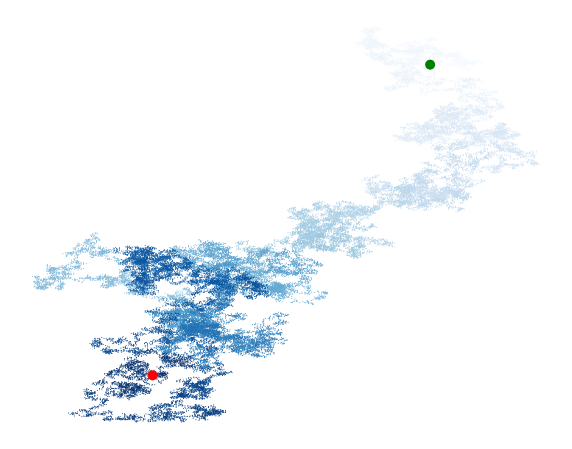

Make another walk? (y/n): y


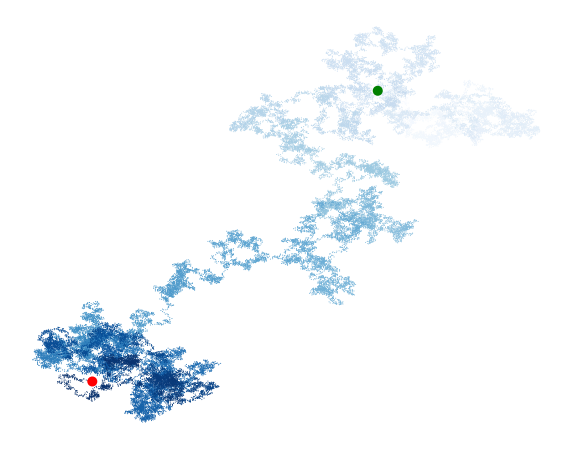

Make another walk? (y/n): n


In [101]:
# Will keep making new walks as long as the program is active

while True:
    # Make a random walk and plot the points
    rw = RandomWalk()
    rw.fill_walk()
    
    # Set the size of the plotting window
    plt.figure(figsize=(10, 8))
    
    # Plotting and coloring the points along a gradient
    point_numbers = list(range(rw.num_points))
    plt.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=cm.Blues, edgecolor='none', s=1)
        
    # Plot the start and end points
    plt.scatter(0,0, c='green', edgecolors='none', s=100)
    plt.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=100)
    
    # Remove the axes
    plt.axis('off')
    
    # Open viewer and display plot
    plt.show()
    
    # Will keep making new walks as long as the user chooses
    keep_running = input("Make another walk? (y/n): ")
    if keep_running[0].lower() == 'n':
        break

# Using Pygal to create SVG files

In [102]:
from random import randint

class Die():
    """A class representing a single die"""
    
    def __init__(self, num_sides=6):
        self.num_sides = num_sides
        
    def roll(self):
        """Return a random value between 1 and the number of sides"""
        return randint(1, self.num_sides)

In [103]:
# Create a D6
die = Die(6)

# Make some rolls, and store results in a list
results = []
for roll_num in range(100):
    result = die.roll()
    results.append(result)
    
print(results)

[2, 3, 3, 5, 1, 5, 6, 2, 2, 1, 5, 1, 4, 6, 4, 5, 5, 5, 1, 2, 3, 1, 3, 5, 6, 3, 3, 2, 6, 1, 2, 5, 4, 3, 2, 6, 1, 5, 6, 2, 1, 2, 5, 6, 5, 5, 5, 1, 3, 2, 2, 5, 6, 4, 4, 1, 5, 6, 4, 6, 6, 3, 2, 5, 1, 4, 5, 1, 5, 3, 5, 1, 2, 4, 2, 2, 2, 6, 2, 1, 6, 1, 2, 2, 1, 2, 5, 1, 5, 1, 2, 3, 1, 6, 5, 2, 2, 6, 1, 6]


In [108]:
# Analyze results of rolling one D6
die = Die(6)

# Make some rolls, and store results in a list
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)
    
# Analyze the results
frequencies = []
for value in range(1, die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
print(frequencies)

6
[160, 176, 166, 151, 191, 156]


In [111]:
# Make a histogram of the results using Pygal

import pygal

die = Die(6)

# Make some rolls, and store results in a list
results = []
for roll_num in range(1000):
    result = die.roll()
    results.append(result)
    
# Analyze the results
frequencies = []
for value in range(1, die.num_sides+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
# Visualize the results
hist = pygal.Bar()

hist.title = "Results of Rolling One D6 1000 Times"
hist.x_labels = ['1','2','3','4','5','6']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"

hist.add('D6', frequencies)
hist.render_to_file('die_visual.svg')

In [118]:
# Rolling Two Dice

# Create two D6 dice
die_1 = Die()
die_2 = Die()

# Make some rolls, and store results in a list
results = []
for roll_num in range(1000):
    result = die_1.roll() + die_2.roll()
    results.append(result)
    
# Analyze the results
frequencies = []
max_result = die_1.num_sides + die_2.num_sides
for value in range(2, max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
# Visualize the results
hist = pygal.Bar()

hist.title = "Results of Rolling Two D6 1000 Times"
hist.x_labels = ['2','3','4','5','6','7','8','9','10','11','12']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"

hist.add('D6 + D6', frequencies)
hist.render_to_file('dice_visual.svg')

In [119]:
# Rolling Dice of Different Sizes

# Create a D6 and D10
die_1 = Die()
die_2 = Die(10)

# Make some rolls, and store results in a list
results = []
for roll_num in range(50000):
    result = die_1.roll() + die_2.roll()
    results.append(result)
    
# Analyze the results
frequencies = []
max_result = die_1.num_sides + die_2.num_sides
for value in range(2, max_result+1):
    frequency = results.count(value)
    frequencies.append(frequency)
    
# Visualize the results
hist = pygal.Bar()

hist.title = "Results of Rolling D6 and D10 Dice 50,000 times"
hist.x_labels = ['2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
hist.x_title = "Result"
hist.y_title = "Frequency of Result"

hist.add('D6 + D10', frequencies)
hist.render_to_file('6_10_dice_visual.svg')